## 1D Burgers' Equation

This is step four of '12 Steps to Navier Stokes'.

We solve Burgers' equation, which is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$

And has the discretisation:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$


### Initial and Boundary Conditions
Initial Condition:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray}

Which has the analytical solution:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

Periodic boundary condition:

$$u(0) = u(2\pi)$$

So first, we need to calculate the term $ \frac{\partial \phi}{\partial x} $ , which is a simple task using SymPy.

In [1]:
import numpy as np
import sympy as sp

from sympy import init_printing
init_printing(use_latex=True)

from sympy.utilities.lambdify import lambdify

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#find the derivative of phi
x, nu, t = sp.symbols('x nu t')
phi = sp.exp(-(x - 4*t)**2 / (4*nu*(t + 1))) + sp.exp(-(x - 4*t - 2*sp.pi)**2 / (4*nu*(t + 1)))
phiprime = phi.diff(x)

#plug the derivative back into our initial condition
u = -2 * nu * (phiprime/phi) + 4
ufunc = lambdify((t, x, nu), u)

### Grid and Plot of Initial State

Now we have the function for our initial condition in Python.
We can go ahead set up our grid and plot the initial condition.

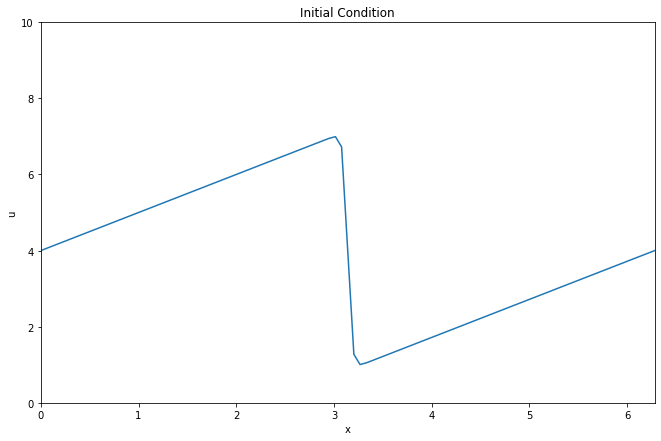

In [3]:
#grid definition
x_len = 2 * np.pi
num_x = 101
num_t = 150
del_x = x_len / (num_x - 1)
nu = 0.07
del_t = del_x * nu

#set up the initial condition using ufunc at t=0
x = np.linspace(0, x_len, num_x)
u_n = np.empty(num_x)
t = 0
u = np.asarray([ufunc(t, x0, nu) for x0 in x])

#plot the initial condition
plt.figure(figsize=(11, 7))
plt.ylim(0, 10)
plt.xlim(0, x_len)
plt.ylabel('u')
plt.xlabel('x')
plt.title('Initial Condition')
plt.plot(x, u)


### Solve

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

In [4]:
for n in range(num_t):
    u_n = u.copy()
    for i in range(1, num_x - 1):
        u[i] = u_n[i] - u_n[i] * (del_t/del_x) * (u_n[i] - u_n[i-1]) + \
            nu * (del_t/del_x**2) * (u_n[i+1] - 2*u_n[i] + u_n[i-1])
        
        #periodic boundary condition
        u[0] = u_n[0] - u_n[0] * (del_t/del_x) * (u_n[0] - u_n[-2]) + \
            nu * (del_t/del_x**2) * (u_n[1] - 2*u_n[0] + u_n[-2])
        u[-1] = u[0]
        
u_analytical = np.asarray([ufunc(num_t * del_t, xi, nu) for xi in x])

Text(0.5, 1.0, "1D Burgers' Equation")

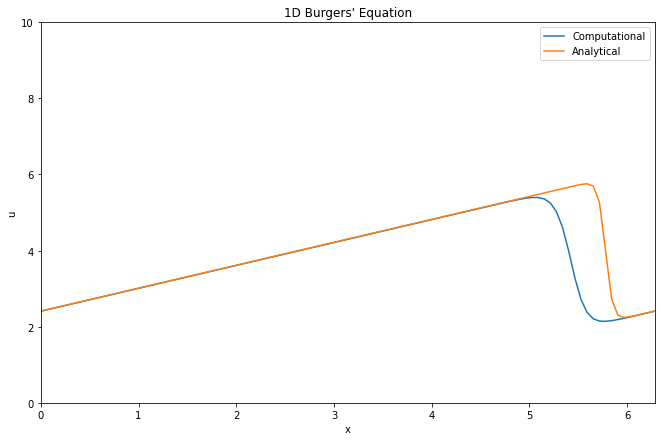

In [5]:
plt.figure(figsize=(11, 7))
plt.plot(x, u, label='Computational')
plt.plot(x, u_analytical, label='Analytical')
plt.legend()
plt.xlim(0, x_len)
plt.ylim(0, 10)
plt.ylabel('u')
plt.xlabel('x')
plt.title('1D Burgers\' Equation')

### Animate

Animation may not display if viewed on Github.

Generate the figure:

Text(0.5, 1.0, "1D Burgers' Equation Time Evolution")

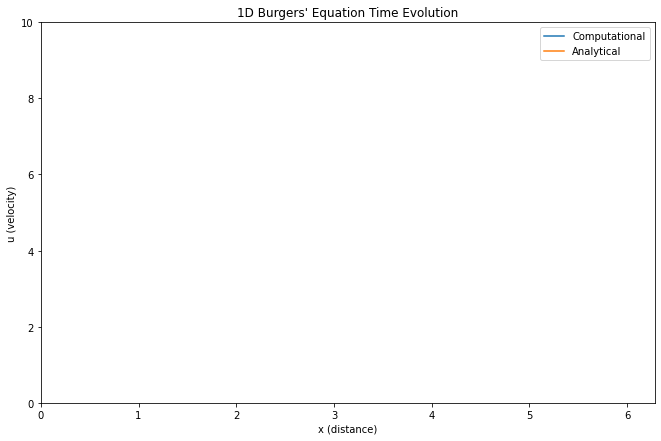

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML

#generate the figure
figure, axes = plt.subplots()
figure.set_size_inches(11, 7)
axes.set_xlim(0, x_len)
axes.set_ylim(0, 10)
computational, = axes.plot([], [], label='Computational')
analytical, = axes.plot([], [], label='Analytical')
plt.legend()
plt.xlabel('x (distance)')
plt.ylabel('u (velocity)')
plt.title('1D Burgers\' Equation Time Evolution')

Now, reset the initial conditions, re-solve, and this time, animate it:

In [7]:
#reset the initial condition
u = np.asarray([ufunc(t, x0, nu) for x0 in x])

#animation initialisation function
def initialise_anim():
    computational.set_data([], [])
    analytical.set_data([], [])
    return (computational, analytical,)

#animation function which calculates u
#we can remove the outer time loop since this will be handled by the animation library
def animate(j):
    x = np.linspace(0, x_len, num_x)
    u_n = u.copy()
    for i in range(1, num_x - 1):
        u[i] = u_n[i] - u_n[i] * (del_t/del_x) * (u_n[i] - u_n[i-1]) + \
            nu * (del_t/del_x**2) * (u_n[i+1] - 2*u_n[i] + u_n[i-1])
        
        #periodic boundary condition
        u[0] = u_n[0] - u_n[0] * (del_t/del_x) * (u_n[0] - u_n[-2]) + \
            nu * (del_t/del_x**2) * (u_n[1] - 2*u_n[0] + u_n[-2])
        u[-1] = u[0]
    
    u_analytical = np.asarray([ufunc(j * del_t, xi, nu) for xi in x])
        
    computational.set_data(x, u)
    analytical.set_data(x, u_analytical)
    return (computational, analytical,)

#finally, run the animation
anim = animation.FuncAnimation(figure, animate, init_func=initialise_anim, frames=num_t, interval=20)
HTML(anim.to_jshtml())